In [15]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [16]:
orgdata = pd.read_csv('abc.csv')

In [17]:
orgdata.head()

,編號,案類,發生日期,發生時段,發生地點,備註
0,1,強盜,1070130,16~18,台北市中山區中山北路2段31~60號,NaN
1,2,強盜,1070301,04~06,台北市北投區福興里致遠一路2段1~30號,NaN
2,3,強盜,1071115,16~18,台北市士林區舊佳里中正路211~240號,NaN
3,4,強盜,1071125,08~10,台北市大安區永康里永康街1~30號,NaN
4,5,強盜,1071211,12~14,台北市文山區博嘉里020鄰木柵路4段1~30號,NaN


In [18]:
documents = ['我是臺師大科技系學生邱致瑋']
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\will_\AppData\Local\Temp\jieba.cache
Loading model cost 0.566 seconds.
Prefix dict has been built successfully.


我/是/臺/師大/科技/系學生/邱致/瑋


In [19]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/邱致瑋


In [20]:
orgdata['seg'] = ""
orgdata.head()

,編號,案類,發生日期,發生時段,發生地點,備註,seg
0,1,強盜,1070130,16~18,台北市中山區中山北路2段31~60號,NaN,
1,2,強盜,1070301,04~06,台北市北投區福興里致遠一路2段1~30號,NaN,
2,3,強盜,1071115,16~18,台北市士林區舊佳里中正路211~240號,NaN,
3,4,強盜,1071125,08~10,台北市大安區永康里永康街1~30號,NaN,
4,5,強盜,1071211,12~14,台北市文山區博嘉里020鄰木柵路4段1~30號,NaN,


In [21]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['發生時段']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\will_\AppData\Local\Temp\ipykernel_19416\389181710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['seg'].iloc[index] = seg_list


In [22]:
orgdata['seg']

0     [16, 18]
1     [04, 06]
2     [16, 18]
3     [08, 10]
4     [12, 14]
5     [02, 04]
6     [20, 22]
7     [10, 12]
8     [00, 02]
9     [22, 24]
10    [14, 16]
11    [04, 06]
12    [22, 24]
13    [02, 04]
14    [06, 08]
15    [00, 02]
16    [04, 06]
17    [04, 06]
18    [02, 04]
19    [00, 02]
20    [18, 20]
21    [21, 22]
Name: seg, dtype: object

In [68]:
words = list(orgdata['發生地點'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [69]:
df = [show_key, show_values]

In [70]:
result = pd.concat(df, axis=1)
result.columns = ['time', 'freguency']
result

,time,freguency
0,台北市中山區中山北路2段31~60號,1
1,台北市北投區福興里致遠一路2段1~30號,1
2,台北市士林區舊佳里中正路211~240號,1
3,台北市大安區永康里永康街1~30號,1
4,台北市文山區博嘉里020鄰木柵路4段1~30號,1
5,台北市文山區景行里車前路29巷,1
6,台北市信義區三犁里象山登山步道(煙火觀景臺),1
7,台北市北投區湖田里陽金公路(馬槽橋下方),1
8,台北市信義區虎林街181~210號,1
9,台北市信義區永吉路225巷4弄1~30號,1


In [71]:
import plotly.express as px
import pandas as pd

px.bar(result, x='time', y='freguency', title='Question')

In [72]:
show_sub = orgdata['發生時段']=='02~04'
subdata = orgdata[show_sub]
subdata

,編號,案類,發生日期,發生時段,發生地點,備註,seg
5,6,強盜,1080124,02~04,台北市文山區景行里車前路29巷,NaN,"[02, 04]"
13,14,強盜,1090404,02~04,台北市大安區光武里忠孝東路4段101巷(大安路1段31巷),NaN,"[02, 04]"
18,19,強盜,1100205,02~04,台北市大同區歸綏街151~180號,NaN,"[02, 04]"


In [73]:
type(subdata['seg'])

pandas.core.series.Series

In [74]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [75]:
subdata_seg_list

[['02', '04'], ['02', '04'], ['02', '04']]

In [76]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [77]:
diction.keys()

dict_keys(['02', '04'])

In [78]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [79]:
import numpy as np

In [80]:
mask = np.array(Image.open("test.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [81]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

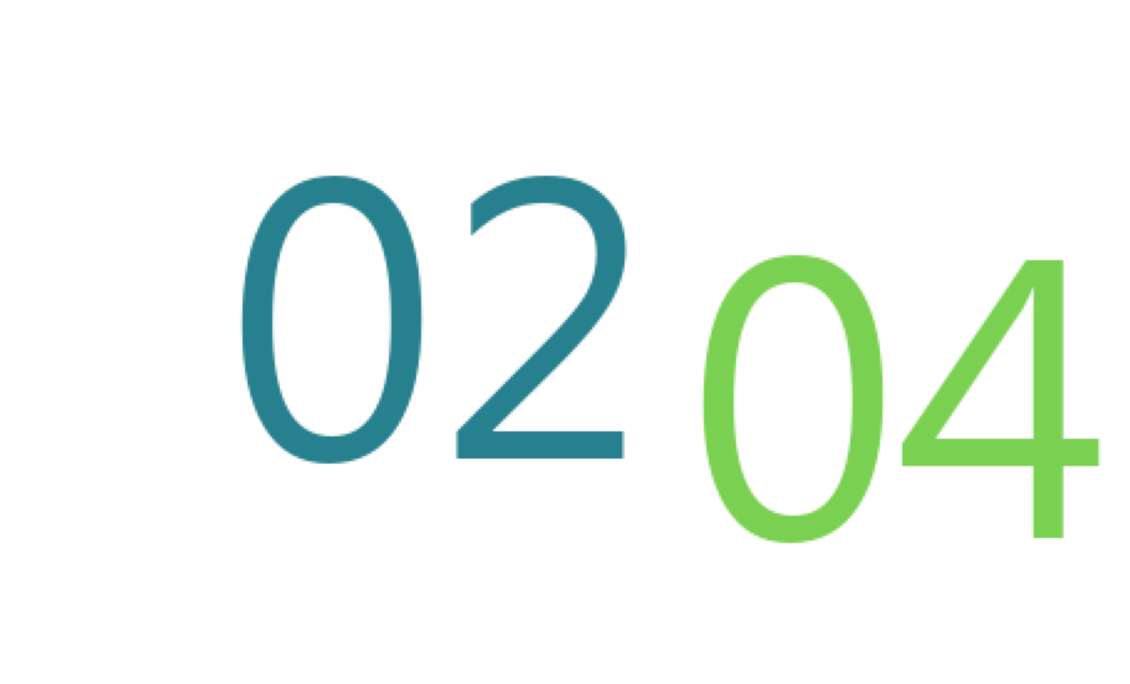

In [82]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [83]:
show_sub = orgdata['特約服務項目']=='日間照顧服務'
subdata = orgdata[show_sub]
subdata

KeyError: '特約服務項目'

In [57]:
subdata.to_csv("test.csv", index=False)